## 决策树应用

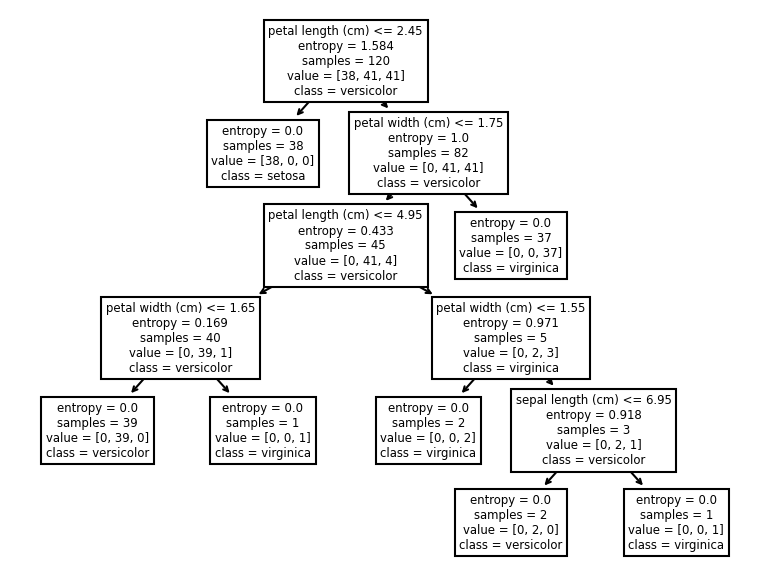

数据[6,5,5,2]的类别： [2]
测试集的标签：
 [0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 1 2 0 0 0 2 2 1 2 0 1]
预测的测试集标签：
 [0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 1 2 0 0 0 2 2 2 2 0 1]
模型准确率为： 0.9666666666666667


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

# 加载Iris数据集
iris = load_iris()

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.20, random_state=30, shuffle=True)

# 创建决策树分类器
clf = tree.DecisionTreeClassifier(criterion='entropy')

# 拟合模型
clf = clf.fit(X_train, y_train)

# 绘制决策树
plt.figure(dpi=150)
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# 预测数据[6,5,5,2]的类别
print('数据[6,5,5,2]的类别：', clf.predict([[6,5,5,2]]))

# 打印测试集的标签
print('测试集的标签：\n', y_test)

# 预测测试集的标签
y_pre = clf.predict(X_test)
print('预测的测试集标签：\n', y_pre)

# 计算并打印模型的准确率
print('模型准确率为：', clf.score(X_test, y_test))

## KNN算法堆Iris数据集分类

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


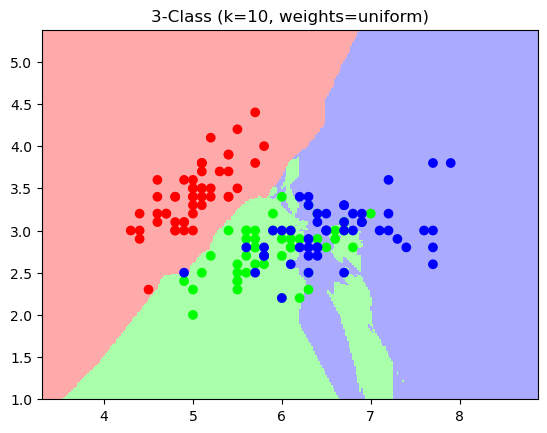

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# 加载Iris数据集
iris = load_iris()
X = iris.data[:, :2]  # 选择前两列特征
y = iris.target

# 打印特征名称
print(iris.feature_names)

# 定义颜色映射
cap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 创建K近邻分类器
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X, y)

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 生成网格点
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

# 预测网格点的类别
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 绘制图形
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-Class (k=10, weights=uniform)')
plt.show()